In [25]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.optimizers import Adam
print('done')

done


In [26]:
img_width, img_height = 299, 299

In [28]:
# importa o modelo InceptionResNetV2 e descarta a última camada do classifier.
base_model=InceptionResNetV2(weights='imagenet',include_top=False, input_shape=(img_width, img_height, 3))

In [29]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_2
1 conv2d_203
2 batch_normalization_203
3 activation_203
4 conv2d_204
5 batch_normalization_204
6 activation_204
7 conv2d_205
8 batch_normalization_205
9 activation_205
10 max_pooling2d_4
11 conv2d_206
12 batch_normalization_206
13 activation_206
14 conv2d_207
15 batch_normalization_207
16 activation_207
17 max_pooling2d_5
18 conv2d_211
19 batch_normalization_211
20 activation_211
21 conv2d_209
22 conv2d_212
23 batch_normalization_209
24 batch_normalization_212
25 activation_209
26 activation_212
27 average_pooling2d_1
28 conv2d_208
29 conv2d_210
30 conv2d_213
31 conv2d_214
32 batch_normalization_208
33 batch_normalization_210
34 batch_normalization_213
35 batch_normalization_214
36 activation_208
37 activation_210
38 activation_213
39 activation_214
40 mixed_5b
41 conv2d_218
42 batch_normalization_218
43 activation_218
44 conv2d_216
45 conv2d_219
46 batch_normalization_216
47 batch_normalization_219
48 activation_216
49 activation_219
50 conv2d_215
51 conv2d_217
52 conv2d_220

In [30]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [31]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_203 (Conv2D)            (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_203 (Batch  (None, 149, 149, 32  96         ['conv2d_203[0][0]']             
 Normalization)                 )                                                           

 batch_normalization_333 (Batch  (None, 17, 17, 160)  480        ['conv2d_333[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_333 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_333[0][0]']
                                                                                                  
 conv2d_331 (Conv2D)            (None, 17, 17, 192)  208896      ['block17_13_ac[0][0]']          
                                                                                                  
 conv2d_334 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_333[0][0]']         
                                                                                                  
 batch_normalization_331 (Batch  (None, 17, 17, 192)  576        ['conv2d_331[0][0]']             
 Normaliza

In [32]:
for layer in base_model.layers:
    layer.trainable = False

In [33]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)
print(train_dir,validation_dir)

Found 2000 files belonging to 2 classes.
C:\Users\admin-17417\.keras\datasets\cats_and_dogs_filtered\train C:\Users\admin-17417\.keras\datasets\cats_and_dogs_filtered\validation


In [35]:
train_datagen=ImageDataGenerator(preprocessing_function = preprocess_input) # incluído nas dependências

validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [36]:
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (img_width, img_height),
                                                 color_mode='rgb',
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

validation_set = validation_datagen.flow_from_directory(validation_dir,
                                                        target_size = (img_width, img_height),
                                                        color_mode='rgb',
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        shuffle=True)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [37]:
history = model.fit(training_set,
                    epochs = 20,
                    validation_data = validation_set)

Epoch 1/20
63/63 [==============================] - 173s 3s/step - loss: 0.1959 - accuracy: 0.9600 - val_loss: 0.0204 - val_accuracy: 0.9960
Epoch 2/20
63/63 [==============================] - 157s 3s/step - loss: 0.0697 - accuracy: 0.9825 - val_loss: 0.0252 - val_accuracy: 0.9940
Epoch 3/20
63/63 [==============================] - 157s 3s/step - loss: 0.0521 - accuracy: 0.9905 - val_loss: 0.0300 - val_accuracy: 0.9940
Epoch 4/20
63/63 [==============================] - 157s 3s/step - loss: 0.0511 - accuracy: 0.9910 - val_loss: 0.0465 - val_accuracy: 0.9920
Epoch 5/20
63/63 [==============================] - 158s 3s/step - loss: 0.0152 - accuracy: 0.9970 - val_loss: 0.0627 - val_accuracy: 0.9910
Epoch 6/20
63/63 [==============================] - 158s 3s/step - loss: 0.0449 - accuracy: 0.9920 - val_loss: 0.0335 - val_accuracy: 0.9940
Epoch 7/20
63/63 [==============================] - 158s 3s/step - loss: 0.0391 - accuracy: 0.9935 - val_loss: 0.0493 - val_accuracy: 0.9930
Epoch 8/20
63

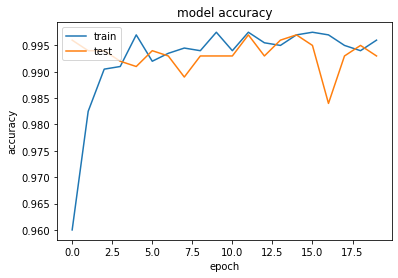

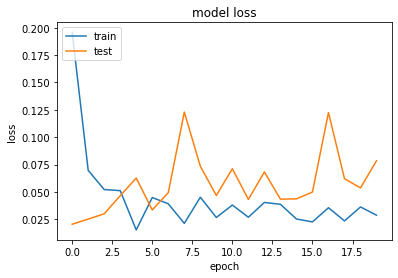

In [41]:
import matplotlib.pyplot as plt

# Gráfico de treino - acurácia
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Gráfico de treino - perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
# métricas de perda e acurácia
score = model.evaluate(validation_set)

print ("%s: %.2f%%" % (model.metrics_names[0], score[0]*100))
print ("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

32/32 [==============================] - 52s 2s/step - loss: 0.0785 - accuracy: 0.9930
loss: 7.85%
accuracy: 99.30%


In [1]:
"""
Title: Simple MNIST convnet
Author: [fchollet](https://twitter.com/fchollet)
Date created: 2015/06/19
Last modified: 2020/04/21
Description: A simple convnet that achieves ~99% test accuracy on MNIST.
"""

"""
## Setup
"""

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

"""
## Prepare the data
"""

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
print("x_train shape:", x_train.shape)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape, "train samples")
print(x_test.shape, "test samples")


# convert class vectors to binary class matrices
print(y_train.shape, "train labels")
print(y_test.shape, "test labels")
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape, "train labels")
print(y_test.shape, "test labels")
"""
## Build the model
"""

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(3, 3)),layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

"""
## Train the model
"""

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

"""
## Evaluate the trained model
"""

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


x_train shape: (60000, 28, 28)
x_train shape: (60000, 28, 28, 1)
(60000, 28, 28, 1) train samples
(10000, 28, 28, 1) test samples
(60000,) train labels
(10000,) test labels
(60000, 10) train labels
(10000, 10) test labels
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                

(28, 28)
(28, 28)


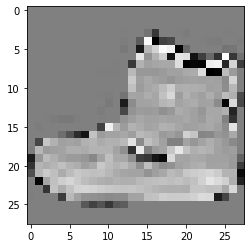

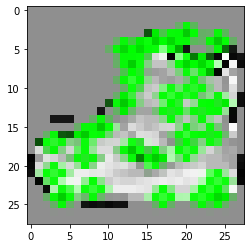

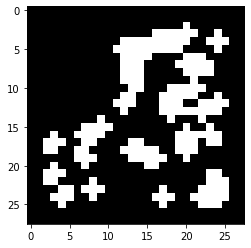

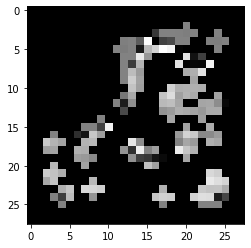

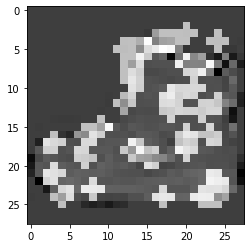

(<matplotlib.image.AxesImage at 0x2735e3f94f0>, None)

In [12]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = (X_train[0,:,:]*255+127).astype(np.uint8)
print(img.shape)
#img = cv.cvtColor(img,cv.COLOR_GRAY2RGB)
# Initiate ORB detector
orb = cv.ORB_create(edgeThreshold=3, patchSize=2, nlevels=2, fastThreshold=7, scaleFactor=7,
                    WTA_K=4,scoreType=cv.ORB_HARRIS_SCORE, firstLevel=0, nfeatures=64)
def get_ORB_all(orb,img):
    print(img.shape)
    reduce=4
    img = reduce*(img//reduce)
    img = cv.equalizeHist(img)
    # find the keypoints with ORB
    kp = orb.detect(img,None)
    # compute the descriptors with ORB
    kp , des = orb.compute(img, kp)
    for k in kp:
        x = int(k.pt[0])
        y = int(k.pt[1])
        s = int(k.size)
        #print("x",x,"y",y,"size",s)
    # draw only keypoints location,not size and orientation
    img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=4)
    img3 = cv.drawKeypoints(img*0, kp, None, color=(255,255,255), flags=4)
    gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
    # Otsu's thresholding
    ret2,mask = cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    return img2,img3,mask

    return mask
img2,img3,mask=get_ORB_all(orb,img)
plt.imshow(img, cmap='gray'), plt.show()
plt.imshow(img2), plt.show()
plt.imshow(mask, cmap='gray'), plt.show()
masked = cv.bitwise_and(img, img, mask=mask)
plt.imshow(masked, cmap='gray'), plt.show()
imgadd=(1.0*img+1.0*mask)
imgmax=np.amax(img)
addmax=np.amax(imgadd)
imgmask=((imgadd/addmax)*imgmax).astype(np.uint8)
plt.imshow(imgmask, cmap='gray'), plt.show()

#plt.imshow(cv.equalizeHist(img), cmap='gray'), plt.show()
#blur1 = cv.GaussianBlur(img,(3,3),0)
#blur2 = cv.GaussianBlur(img,(5,5),0)
#delta=cv.equalizeHist(cv.absdiff(blur1,blur2))
#plt.imshow(delta, cmap='gray'), plt.show()
#edges = cv.Canny(blur2,100,200)
#kernel = np.ones((3,3),np.uint8)
#edges2 = cv.dilate(edges,kernel,iterations = 3)
#plt.imshow(edges, cmap='gray'), plt.show()
#print("done")
#norm=((img.astype("float32")-127) / 255)*edges
#plt.imshow((norm*255+127).astype(np.uint8), cmap='gray'), plt.show()


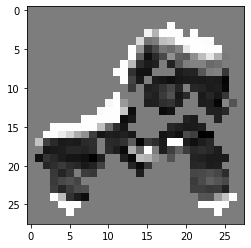

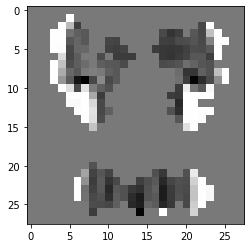

(60000, 28, 28)
(60000, 28, 28, 1)


In [66]:
plt.imshow(((X_train_mask[0]*255)+127).astype(np.uint8), cmap='gray'), plt.show()
plt.imshow(((X_train_mask[10]*255)+127).astype(np.uint8), cmap='gray'), plt.show()
print(X_train_mask.shape)
X_train_mask_norm  = np.expand_dims(X_train_mask , -1)
print(X_train_mask_norm.shape)

In [9]:
import receptive_field as rf
import tensorflow.compat.v1 as tf
from receptive_field.python.util import graph_compute_order
g = tf.Graph()
with g.as_default():
    model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(3, 3)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax",name="output"),
    ])
    #for i, layer in enumerate(model.layers):
    #   print(i, layer.name)

node_info, name_to_node = graph_compute_order.get_compute_order(
      graph_def=g.as_graph_def(),
      input_node_name='input_1',
      input_node_size=None)
#for node in node_info.items():
#     print(node[0])
        


# Compute receptive field parameters.
rf_x, rf_y, eff_stride_x, eff_stride_y, eff_pad_x, eff_pad_y = \
  rf.compute_receptive_field_from_graph_def( \
    g.as_graph_def(), 'input_1', 'max_pooling2d_2/MaxPool')
print(rf_x, rf_y, eff_stride_x, eff_stride_y, eff_pad_x, eff_pad_y)

26 26 12 12 0 0


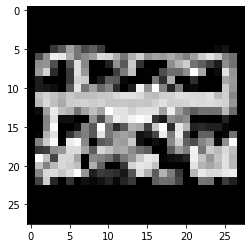

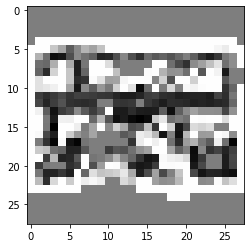

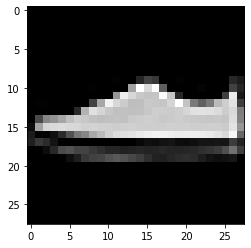

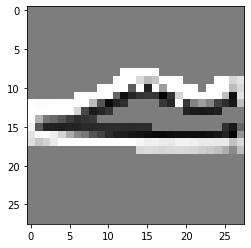

(<matplotlib.image.AxesImage at 0x224831ff550>, None)

In [6]:
import cv2 as cv
from matplotlib import pyplot as plt
plt.imshow(((X_train_mask[10000,:,:,0]*255)+color_offset).astype(np.uint8), cmap='gray'), plt.show()
plt.imshow(((X_train_mask[10000,:,:,1]*255)+color_offset).astype(np.uint8), cmap='gray'), plt.show()
plt.imshow(((X_train_mask[20000,:,:,0]*255)+color_offset).astype(np.uint8), cmap='gray'), plt.show()
plt.imshow(((X_train_mask[20000,:,:,1]*255)+color_offset).astype(np.uint8), cmap='gray'), plt.show()


In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
import cv2 as cv
from numba import cuda 
device = cuda.get_current_device()
device.reset()

# define Keypoint masking method
def get_mask(img):
    orb = cv.ORB_create(edgeThreshold=3, patchSize=2, nlevels=2, fastThreshold=7, scaleFactor=7,
                    WTA_K=4,scoreType=cv.ORB_HARRIS_SCORE, firstLevel=0, nfeatures=64)
    reduce=1
    imgm = reduce*(img//reduce)
    imgm = cv.equalizeHist(imgm)
    # find the keypoints with ORB
    kp = orb.detect(imgm,None)
    # compute the descriptors with ORB
    kp , des = orb.compute(imgm, kp)
    for k in kp:
        x = int(k.pt[0])
        y = int(k.pt[1])
        s = int(k.size)
        #print("x",x,"y",y,"size",s)
    # draw only keypoints location,not size and orientation
    img3 = cv.drawKeypoints(imgm*0, kp, None, color=(255,255,255), flags=4)
    gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
    # Otsu's thresholding
    ret2,mask = cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    return mask
"""
## Prepare the data
"""

# Model / data parameters
num_classes = 2
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
#(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
print("x_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape,Y_train)
# Scale images to the [0, 1] range
print("maximum",np.amax(X_train))
# create train set
(x,l,c)=X_train.shape
X_train_mask=  np.zeros((2*x,l,c)).astype("float32")
Y_train_mask=  np.zeros(2*x)
for i,img in enumerate(X_train):
    mask=get_mask(img).astype("float32")/255
    img=img.astype("float32")/255
    X_train_mask[2*i+1]=img*mask
    Y_train_mask[2*i+1]=0
    negativemask=1-mask
    X_train_mask[2*i]=img*negativemask
    Y_train_mask[2*i]=1
print("X_train_mask.shape",X_train_mask.shape)
print("Y_train_mask.shape",Y_train_mask.shape)
print("Y_train.shape",Y_train.shape)
X_train_mask  = np.expand_dims(X_train_mask , -1)
print("X_train_mask.shape",X_train_mask.shape)
 
# create test set
(x,l,c)=X_test.shape
X_test_mask=  np.zeros((2*x,l,c)).astype("float32")
Y_test_mask=  np.zeros(2*x)
for i,img in enumerate(X_test):
    mask=get_mask(img).astype("float32")/255
    img=img.astype("float32")/255
    X_test_mask[2*i+1]=img*mask
    Y_test_mask[2*i+1]=0
    negativemask=1-mask
    X_test_mask[2*i]=img*negativemask
    Y_test_mask[2*i]=1
print("X_train_mask max",np.amax(X_test_mask))
print("X_test_mask max",np.amax(X_test_mask))
print("X_train_mask avg",np.average(X_train_mask))
print("X_test_mask avg",np.average(X_test_mask))
print("X_test_mask.shape",X_test_mask.shape)
print("Y_test_mask.shape",Y_test_mask.shape)
print("Y_test.shape",Y_test.shape)
X_test_mask  = np.expand_dims(X_test_mask , -1)
print("X_test_mask.shape",X_test_mask.shape)
# convert class vectors to binary class matrices
Y_train_mask = keras.utils.to_categorical(Y_train_mask, num_classes)
print("Y_train_mask.shape",Y_train_mask.shape)
print("Y_train.shape",Y_train.shape)
Y_test_mask = keras.utils.to_categorical(Y_test_mask, num_classes)

"""
## Build the model to 
"""

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3),strides=(1, 1), activation="relu"),
        layers.MaxPooling2D(pool_size=(3, 3)),
        layers.Dropout(0.5),        
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

"""
## Train the model
"""

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(X_train_mask.shape)
model.fit(X_train_mask , Y_train_mask, batch_size=batch_size, epochs=epochs, validation_split=0.3)
"""
## Evaluate the trained model
"""
print(X_test_mask.shape)
score = model.evaluate(X_test_mask , Y_test_mask, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

x_train shape: (60000, 28, 28)
Y_train shape: (60000,) [9 0 0 ... 3 0 5]
maximum 255
X_train_mask.shape (120000, 28, 28)
Y_train_mask.shape (120000,)
Y_train.shape (60000,)
X_train_mask.shape (120000, 28, 28, 1)
X_train_mask max 1.0
X_test_mask max 1.0
X_train_mask avg 0.14302045
X_test_mask avg 0.14342478
X_test_mask.shape (20000, 28, 28)
Y_test_mask.shape (20000,)
Y_test.shape (10000,)
X_test_mask.shape (20000, 28, 28, 1)
Y_train_mask.shape (120000, 2)
Y_train.shape (60000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 

conv2d
conv2d
conv2d (3, 3, 1, 32)


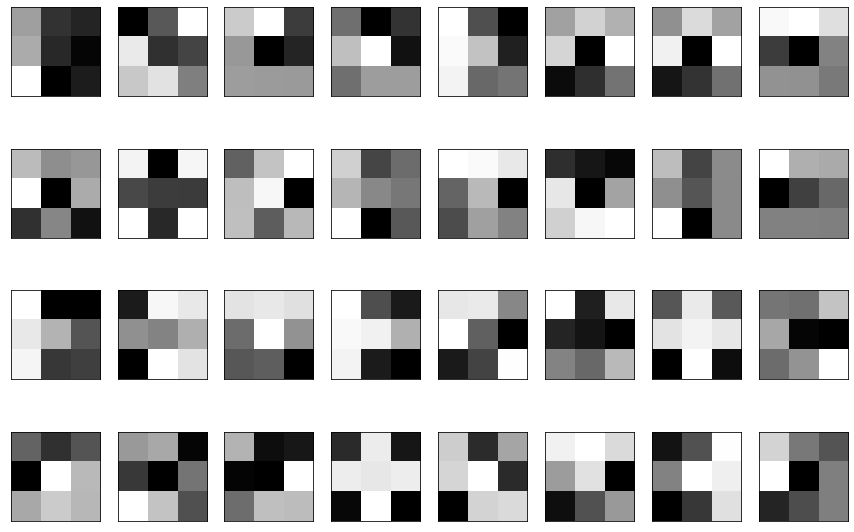

X_test_mask.shape (20000, 28, 28, 1)
img.shape (1, 28, 28, 1)
(1, 8, 8, 32)
1.1656151 0.0


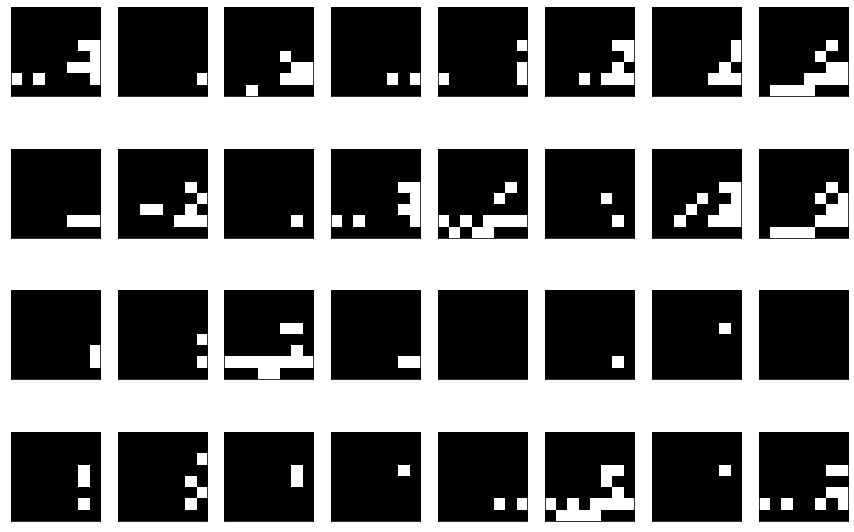

img.shape (1, 28, 28, 1)
(1, 8, 8, 32)
1.1640688 0.0


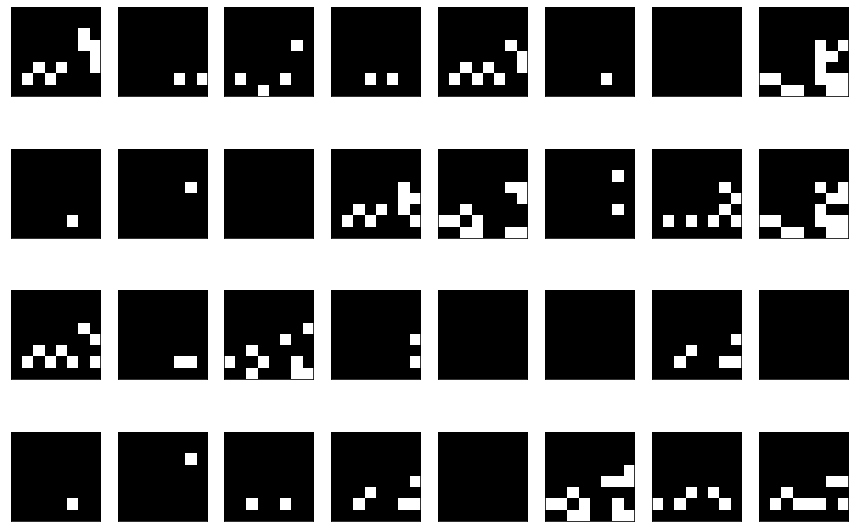

max_pooling2d
dropout
flatten
dense


In [12]:
from matplotlib import pyplot
import numpy as np
import tensorflow as tf
import pickle
pyplot.rcParams["figure.figsize"] = (15,10)
def plot_feature_maps(feature_maps,rows,cols):
    print(np.amax(feature_maps),np.amin(feature_maps))
    feature_maps=np.where(feature_maps>0.5,1,0)
    ix = 1
    for _ in range(rows):
        for _ in range(cols):
            # specify subplot and turn of axis
            ax = pyplot.subplot(rows, cols, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
            ix += 1
    pyplot.show()     
for layer in model.layers:
    print(layer.name)
    if layer.name=="conv2d":
        print("conv2d")
        weights=layer.get_weights()
        pickle.dump( weights, open( "weights_save.p", "wb" ) )
        filters, biases=weights
        print(layer.name, filters.shape)
        rows=4
        cols=8
        f, axs = pyplot.subplots(rows, cols, sharey=True)
        # normalize filter values to 0-1 so we can visualize them
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)
        n_filters, ix = 32, 0
        for i in range(n_filters):
            # get the filter
            f = filters[:, :, :, i]
            # specify subplot and turn of axis
            row=ix//cols
            col=ix-cols*row
            ax=axs[row,col]
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            ax.imshow(f[:, :, 0], cmap='gray')
            ix += 1
        # show the figure
        pyplot.show()
        # load the image with the required shape
        print("X_test_mask.shape",X_test_mask.shape)
        img = X_test_mask[0,:,:,:]
        # expand dimensions so that it represents a single 'sample'
        img = np.expand_dims(img, axis=0)
        print("img.shape",img.shape)
        # get feature map for first hidden layer
        # redefine model to output right after the first hidden layer
        model_ = tf.keras.Model(inputs=model.inputs, outputs=model.layers[1].output)
        feature_maps = model_(img)
        print(feature_maps.shape)
        # plot all 32 maps 
        
        plot_feature_maps(feature_maps,rows,cols)
        
        # second one
        img = X_test_mask[1,:,:,:]
        # expand dimensions so that it represents a single 'sample'
        img = np.expand_dims(img, axis=0)
        print("img.shape",img.shape)
        # get feature map for first hidden layer
        # redefine model to output right after the first hidden layer
        feature_maps = model_(img)
        print(feature_maps.shape)
        plot_feature_maps(feature_maps,rows,cols)
        pyplot.show()

Train Average 0.2860402
Test Average 0.28684944


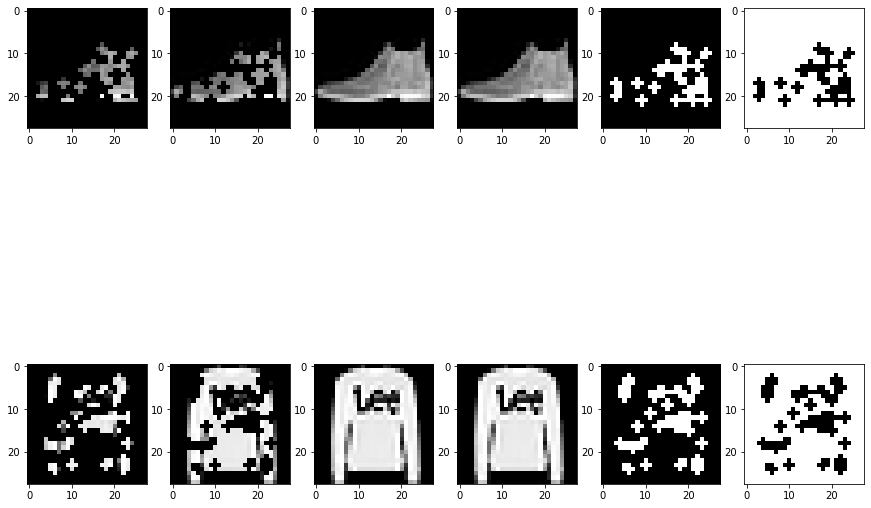

In [27]:
import cv2 as cv
import numpy as np

from matplotlib import pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
#(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
print("Train Average",np.average(X_train.astype("float32")/255))
print("Test Average",np.average(X_test.astype("float32")/255))
plt.rcParams['figure.figsize'] = [15,12]
maxplt=2
fig, ax = plt.subplots(maxplt,6)
# define Keypoint masking method
def get_mask(img):
    orb = cv.ORB_create(edgeThreshold=3, patchSize=2, nlevels=2, fastThreshold=7, scaleFactor=7,
                    WTA_K=4,scoreType=cv.ORB_HARRIS_SCORE, firstLevel=0, nfeatures=64)
    reduce=4
    imgm = reduce*(img//reduce)
    imgm = cv.equalizeHist(imgm)
    # find the keypoints with ORB
    kp = orb.detect(imgm,None)
    # compute the descriptors with ORB
    kp , des = orb.compute(imgm, kp)
    for k in kp:
        x = int(k.pt[0])
        y = int(k.pt[1])
        s = int(k.size)
        #print("x",x,"y",y,"size",s)
    # draw only keypoints location,not size and orientation
    img3 = cv.drawKeypoints(imgm*0, kp, None, color=(255,255,255), flags=4)
    gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
    # Otsu's thresholding
    ret2,mask = cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    return mask
for i,img in enumerate(X_test):
    mask=get_mask(img).astype("float32")/255
    img=img.astype("float32")/255
    masked=img*mask
    negativemask=1-mask
    nonmasked=img*negativemask
    ax[i,0].imshow(masked, cmap='gray')
    ax[i,1].imshow(nonmasked, cmap='gray')
    ax[i,2].imshow(img, cmap='gray')
    ax[i,3].imshow(masked+nonmasked, cmap='gray')
    ax[i,4].imshow(mask, cmap='gray')
    ax[i,5].imshow(negativemask, cmap='gray')
    if i+1>=maxplt:
        break




plt.show()


In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import fashion_mnist# Load the data and split it between train and test sets
#(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
print("x_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape,Y_train)
# Scale images to the [0, 1] range
print("maximum",np.amax(X_train))
# define Keypoint masking method
def get_mask(img):
    orb = cv.ORB_create(edgeThreshold=3, patchSize=2, nlevels=2, fastThreshold=7, scaleFactor=7,
                    WTA_K=4,scoreType=cv.ORB_HARRIS_SCORE, firstLevel=0, nfeatures=64)
    reduce=4
    imgm = reduce*(img//reduce)
    imgm = cv.equalizeHist(imgm)
    # find the keypoints with ORB
    kp = orb.detect(imgm,None)
    # compute the descriptors with ORB
    kp , des = orb.compute(imgm, kp)
    for k in kp:
        x = int(k.pt[0])
        y = int(k.pt[1])
        s = int(k.size)
        #print("x",x,"y",y,"size",s)
    # draw only keypoints location,not size and orientation
    img3 = cv.drawKeypoints(imgm*0, kp, None, color=(255,255,255), flags=4)
    gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
    # Otsu's thresholding
    ret2,mask = cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    return mask
def create_dataset(dataset):
    # create train set
    (x,l,c)=dataset.shape
    X_mask=  np.zeros((2*x,l,c)).astype("float32")
    Y_mask=  np.zeros(2*x)
    for i,img in enumerate(X_train):
        mask=get_mask(img).astype("float32")/255
        img=img.astype("float32")/255
        X_train_mask[2*i+1]=img*mask
        X_train_mask[2*i+1]=0
        negativemask=1-mask
        X_train_mask[2*i]=img*negativemask
        X_train_mask[2*i]=1
print("X_train_mask.shape",X_train_mask.shape)
print("Y_train_mask.shape",Y_train_mask.shape)
print("Y_train.shape",Y_train.shape)
X_train_mask  = np.expand_dims(X_train_mask , -1)
print("X_train_mask.shape",X_train_mask.shape)
 
# create test set
(x,l,c)=X_test.shape
X_test_mask=  np.zeros((2*x,l,c)).astype("float32")
Y_test_mask=  np.zeros(2*x)
for i,img in enumerate(X_test):
    mask=get_mask(img).astype("float32")/255
    img=img.astype("float32")/255
    X_test_mask[2*i+1]=img*mask
    Y_test_mask[2*i+1]=0
    negativemask=1-mask
    X_test_mask[2*i]=img*negativemask
    Y_test_mask[2*i]=1
print("X_test_mask.shape",X_test_mask.shape)
print("Y_test_mask.shape",Y_test_mask.shape)
print("Y_test.shape",Y_test.shape)

In [14]:
"""
Title: Simple MNIST convnet
Author: [fchollet](https://twitter.com/fchollet)
Date created: 2015/06/19
Last modified: 2020/04/21
Description: A simple convnet that achieves ~99% test accuracy on MNIST.
"""

"""
## Setup
"""

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import pickle
"""
## Prepare the data
"""

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
print("x_train shape:", x_train.shape)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape, "train samples")
print(x_test.shape, "test samples")


# convert class vectors to binary class matrices
print(y_train.shape, "train labels")
print(y_test.shape, "test labels")
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape, "train labels")
print(y_test.shape, "test labels")
"""
## Build the model
"""

model_2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu",name="conv2d"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(3, 3)),layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
for layer in model.layers:
    print(layer.name)
    if layer.name=="conv2d":
        weights=pickle.load( open( "weights_save.p", "rb" ) )
        layer.set_weights(weights)
        layer.trainable = False  


model_2.summary()

"""
## Train the model
"""

batch_size = 128
epochs = 15

model_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

"""
## Evaluate the trained model
"""

score = model_2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


x_train shape: (60000, 28, 28)
x_train shape: (60000, 28, 28, 1)
(60000, 28, 28, 1) train samples
(10000, 28, 28, 1) test samples
(60000,) train labels
(10000,) test labels
(60000, 10) train labels
(10000, 10) test labels
conv2d
max_pooling2d
dropout
flatten
dense
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                 